In [71]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

import pickle

In [72]:
df = pd.read_csv('college_placement.csv') 

In [73]:
df.shape

(2966, 8)

In [74]:
df.sample(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
72,22,Male,Computer Science,3,9,0,0,1
102,23,Male,Mechanical,1,5,0,0,0
483,22,Male,Information Technology,1,6,0,0,1
1501,24,Male,Computer Science,1,6,1,1,1
694,22,Male,Information Technology,1,7,0,0,0
1393,21,Female,Information Technology,1,8,0,0,1
2,22,Female,Information Technology,1,6,0,0,1
1157,22,Male,Information Technology,1,7,0,0,0
1402,22,Male,Information Technology,3,8,0,0,1
1319,26,Male,Computer Science,0,6,0,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [76]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [77]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [78]:
df.duplicated().sum()

1829

In [79]:
df.shape

(2966, 8)

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
df.shape

(1137, 8)

In [82]:
df.duplicated().sum()

0

In [91]:
df[['Age','Internships','CGPA','PlacedOrNot','Hostel','HistoryOfBacklogs']].corr().PlacedOrNot

Age                  0.052444
Internships          0.164916
CGPA                 0.533497
PlacedOrNot          1.000000
Hostel              -0.048414
HistoryOfBacklogs   -0.055885
Name: PlacedOrNot, dtype: float64

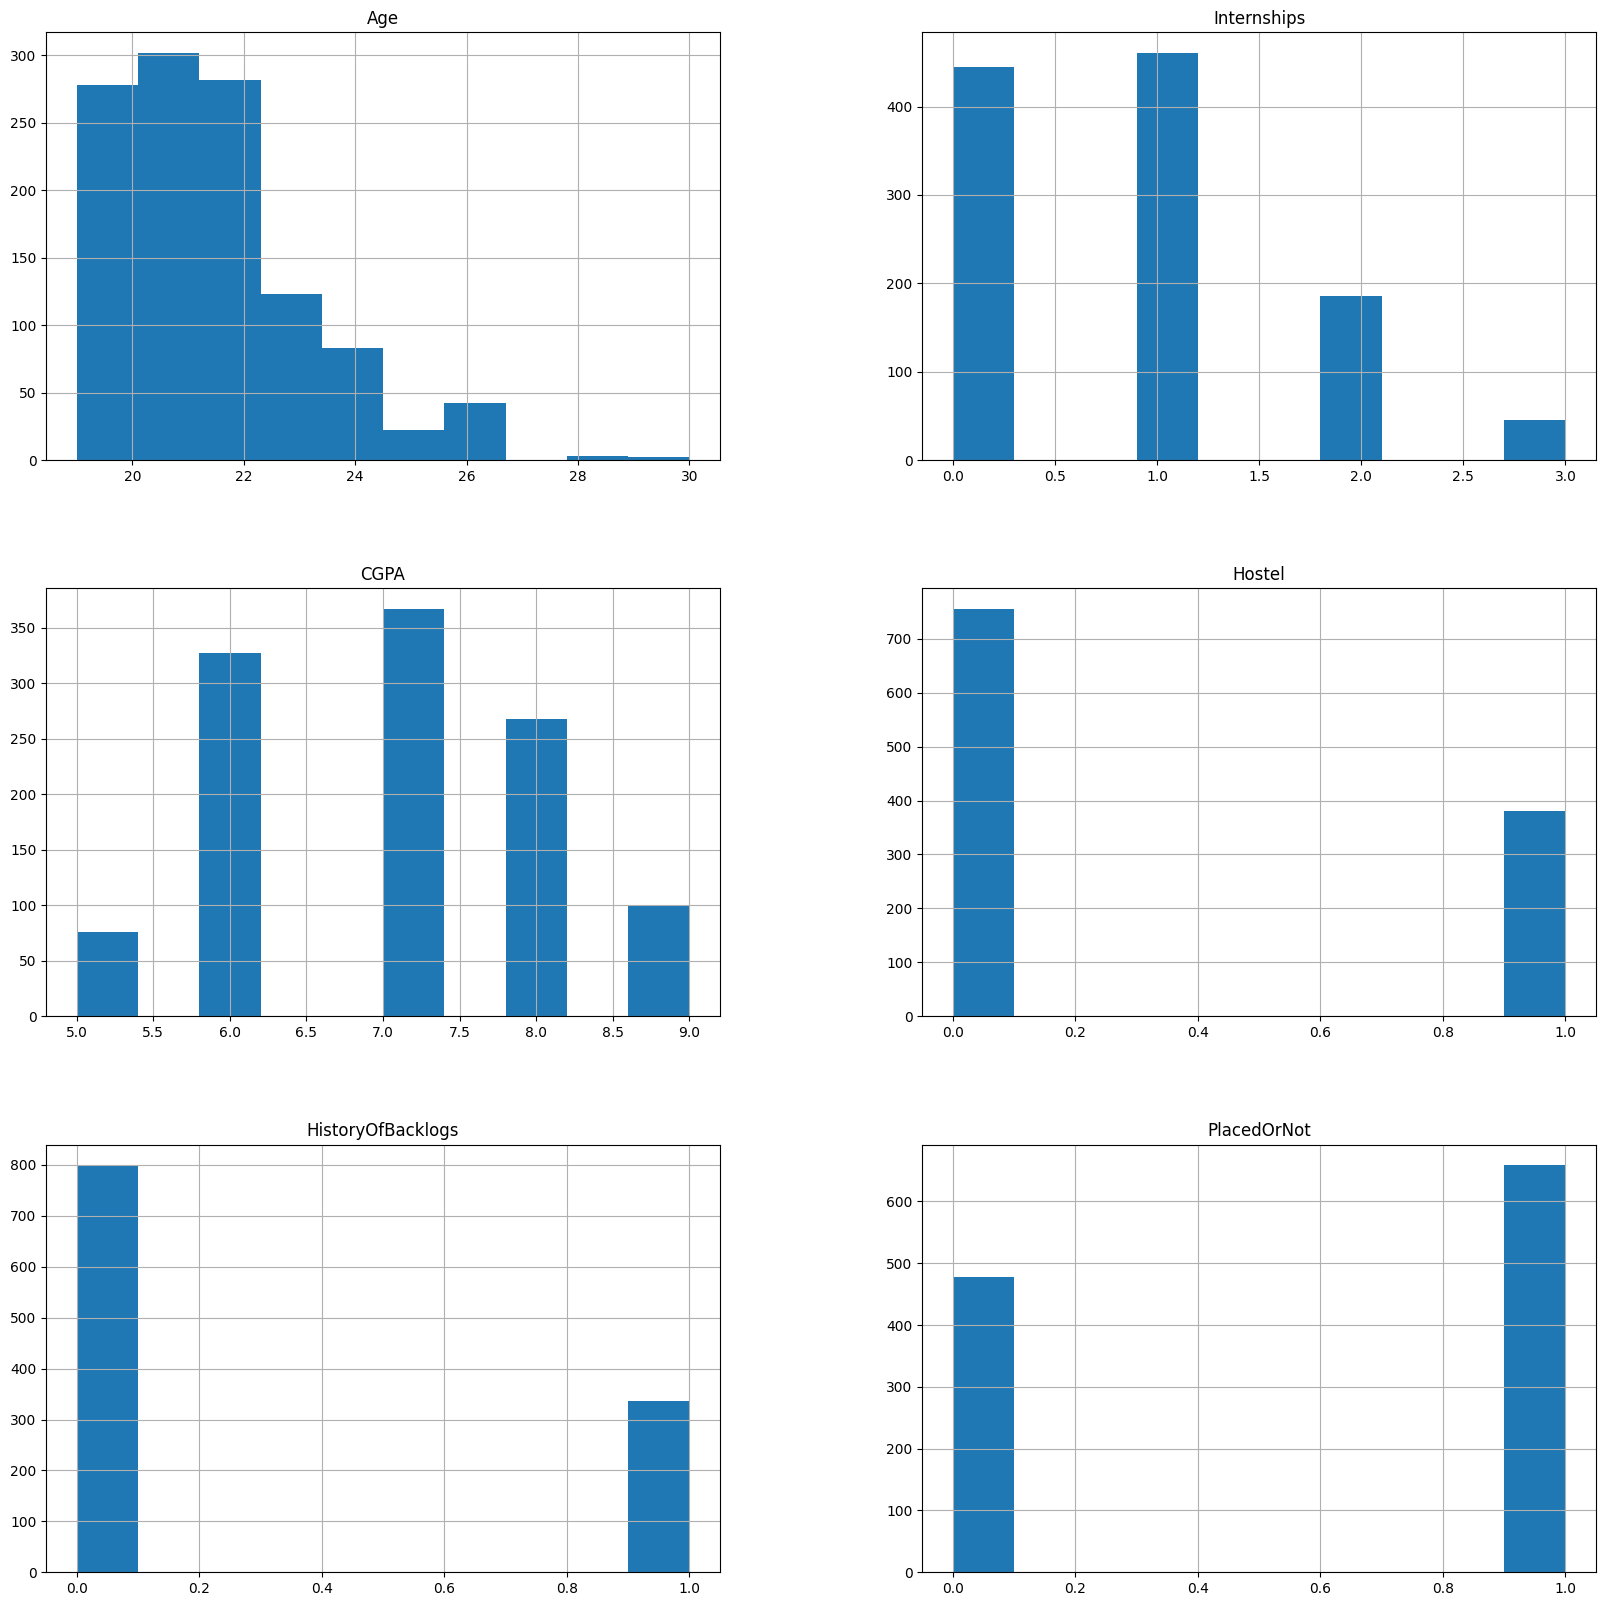

In [86]:
histogram = df.hist(figsize = (20,20))

In [87]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    659
0    478
Name: count, dtype: int64

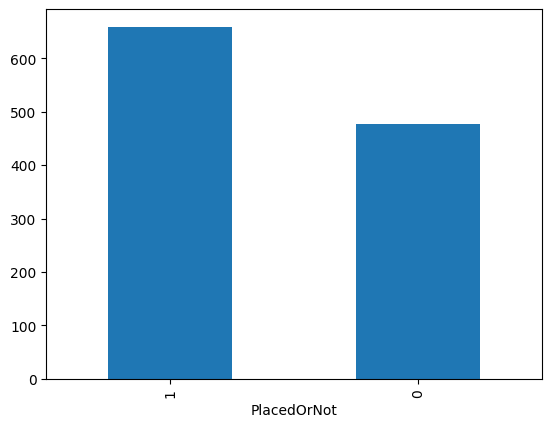

In [88]:
p=df.PlacedOrNot.value_counts().plot(kind="bar")

In [17]:
df.groupby(['Gender','PlacedOrNot']).size().reset_index(name='count')

,Gender,PlacedOrNot,count
0,Female,0,131
1,Female,1,160
2,Male,0,347
3,Male,1,499


In [18]:
df.groupby('Gender')['PlacedOrNot'].mean()

Gender
Female    0.549828
Male      0.589835
Name: PlacedOrNot, dtype: float64

In [92]:
df.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1726,20,Male,Computer Science,0,5,0,0,0
1528,22,Female,Electrical,1,7,0,0,0
105,23,Male,Information Technology,1,6,0,0,0
72,22,Male,Computer Science,3,9,0,0,1
2519,21,Male,Civil,0,8,0,1,1


In [93]:
df.groupby('Stream')['PlacedOrNot'].mean()

Stream
Civil                            0.513158
Computer Science                 0.621399
Electrical                       0.543750
Electronics And Communication    0.603448
Information Technology           0.629630
Mechanical                       0.515152
Name: PlacedOrNot, dtype: float64

In [94]:
X=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']

In [95]:
y.value_counts()

PlacedOrNot
1    659
0    478
Name: count, dtype: int64

In [96]:
# Define which columns should be encoded vs scaled
columns_to_encode = ['Gender', 'Stream']
columns_to_scale  = ['Age', 'CGPA','Internships']
unaltered_columns = ['Hostel','HistoryOfBacklogs']

In [97]:
# Instantiate encoder/scaler
ohe_encoder = OneHotEncoder(sparse=False, drop = 'first', handle_unknown='ignore')

scaler = StandardScaler()

In [98]:
# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(X[columns_to_scale]) 
encoded_columns = ohe_encoder.fit_transform(X[columns_to_encode])

C:\Users\samui\anaconda3\envs\ece715_projects\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
# Concatenate (Column-Bind) Processed Columns Back Together
X_processed = np.concatenate([scaled_columns, encoded_columns,df[unaltered_columns]], axis=1)

In [100]:
y.value_counts()

PlacedOrNot
1    659
0    478
Name: count, dtype: int64

In [101]:
X_processed.shape

(1137, 11)

In [102]:
smote=SMOTE(sampling_strategy='minority')

X_b,y_b=smote.fit_resample(X_processed,y)

In [103]:
X_b.shape

(1318, 11)

In [104]:
y_b.value_counts()

PlacedOrNot
1    659
0    659
Name: count, dtype: int64

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X_b,y_b,test_size=0.2)

In [106]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

LogisticRegression()

In [107]:
y_pred_train = clf.predict(X_train)

accuracy_score(y_train,y_pred_train)

0.7371916508538899

In [108]:
y_pred_test = clf.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.7575757575757576

In [109]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [110]:
scores

array([0.73933649, 0.74881517, 0.70616114, 0.75829384, 0.70952381])

In [111]:
scores.mean()

0.7324260889189799

In [112]:
clf2 = svm.SVC()

clf2.fit(X_train,y_train)

SVC()

In [113]:
y_pred_train = clf2.predict(X_train)

accuracy_score(y_train,y_pred_train)

0.8406072106261859

In [114]:
scores = cross_val_score(clf2, X_train, y_train, cv=5)

In [115]:
scores.mean()

0.8140555179417739

In [116]:
param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf','poly','sigmoid'],'gamma': ['scale','auto', 0.00001, 0.0001, 0.001,0.01,0.1,1,5]}

In [117]:
random_search = RandomizedSearchCV(clf2, param_grid, scoring='accuracy', cv = 5, verbose=5,return_train_score=True)

In [119]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1000, gamma=1e-05, kernel=linear;, score=(train=0.738, test=0.763) total time=   2.3s
[CV 2/5] END C=1000, gamma=1e-05, kernel=linear;, score=(train=0.749, test=0.754) total time=   3.1s
[CV 3/5] END C=1000, gamma=1e-05, kernel=linear;, score=(train=0.753, test=0.720) total time=   2.2s
[CV 4/5] END C=1000, gamma=1e-05, kernel=linear;, score=(train=0.745, test=0.768) total time=   3.3s
[CV 5/5] END C=1000, gamma=1e-05, kernel=linear;, score=(train=0.755, test=0.700) total time=   3.6s
[CV 1/5] END C=100, gamma=scale, kernel=poly;, score=(train=0.907, test=0.711) total time=   0.1s
[CV 2/5] END C=100, gamma=scale, kernel=poly;, score=(train=0.885, test=0.806) total time=   0.1s
[CV 3/5] END C=100, gamma=scale, kernel=poly;, score=(train=0.905, test=0.820) total time=   0.1s
[CV 4/5] END C=100, gamma=scale, kernel=poly;, score=(train=0.888, test=0.844) total time=   0.0s
[CV 5/5] END C=100, gamma=scale, kernel=po

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': ['scale', 'auto', 1e-05,
                                                  0.0001, 0.001, 0.01, 0.1, 1,
                                                  5],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='accuracy', verbose=5)

In [120]:
random_search.best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 0.1}

In [121]:
random_search.best_score_

0.8282870683818551

In [122]:
clf2 = svm.SVC(kernel= 'rbf', gamma= 'scale', C= 10)

clf2.fit(X_train,y_train)

SVC(C=10)

In [123]:
y_pred_train = clf2.predict(X_train)

accuracy_score(y_train,y_pred_train)

0.8861480075901328

In [124]:
scores = cross_val_score(clf2, X_train, y_train, cv=5)

In [53]:
scores.mean()

0.8339381629429022

In [125]:
y_pred_test = clf2.predict(X_test)

accuracy_score(y_test,y_pred_test)

0.8257575757575758

In [126]:
pickle.dump(clf2,open('model.pkl','wb'))

In [127]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [128]:
pickle.dump(ohe_gender, open('ohe_encoder.pkl','wb'))